# Coronavirus (COVID-19) Timeseries of Global Cases
## Nathaniel Parker
## February 26, 2020

In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import the csv files from the the github repository URL to python

confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [3]:
# Displaying first five rows of confirmed global cases of Coronavirus

confirmed_cases[0:5]


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,973,982,986,987,988,989,989,989,989,989
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,381,387,393,395,396,399,399,399,400,400
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,553,555,560,567,572,573,575,576,576,576
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,290,292,293,293,293,293,293,293,294,294
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [4]:
# Covert the uploaded data to dataframe

df_cases = pd.DataFrame(confirmed_cases)
df_deaths = pd.DataFrame(deaths)
df_recovered = pd.DataFrame(recovered)


# Extract the columns for each incident

columns_cases = df_cases.columns #df.columns
columns_deaths = df_deaths.columns
columns_recovered = df_recovered.columns


# Sum the number of people in each column of the dates

sum_cases = df_cases.iloc[:, 4:len(columns_cases)].sum()
sum_deaths = df_deaths.iloc[:, 4:len(columns_deaths)].sum()
sum_recovered = df_recovered.iloc[:, 4:len(columns_recovered)].sum()



In [5]:
# Extract the incident dates from the columns and storethem in datetime format

dates_cases = pd.to_datetime(columns_cases[4:len(columns_cases)])
dates_deaths = pd.to_datetime(columns_deaths[4:len(columns_deaths)])
dates_recovered = pd.to_datetime(columns_recovered[4:len(columns_recovered)])


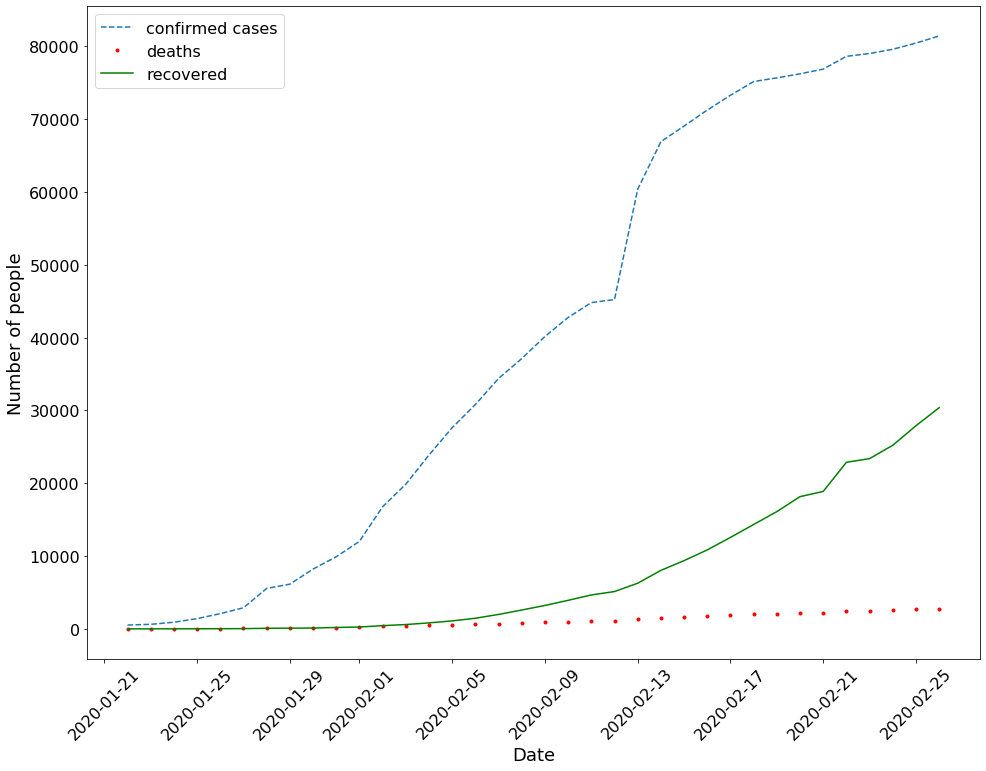

In [6]:
# Plot a figure showing the confirmed global Coronavirus cases, deaths, and recovery

## Before plotting add the line of code below
pd.plotting.register_matplotlib_converters() 

## The code  above registers the matplotlib converters before doing plotting the graph
## This was introduced around pandas 0.24.to avoid 'FutureWarning' message which occurs typically if you use fbprophet 0.4 with pd 0.24.2.



plt.figure(figsize = (16,12)) # figure size

## plots
plot_confirmed = plt.plot(dates_cases,sum_cases,'--')
plot_deaths = plt.plot(dates_deaths,sum_deaths,'.r')
plot_recovered = plt.plot(dates_recovered,sum_recovered,'g')


# Label the axes and legends of the figure
plt.xlabel('Date', size = 18)
plt.ylabel('Number of people',size = 18)
plt.legend(['confirmed cases','deaths','recovered'], prop={"size":16}, loc = 'upper left')


## Assign rotational position for the axes tick marks
plt.tick_params(axis='x', labelsize=16, rotation=45)
plt.tick_params(axis='y', labelsize=16)

## Save the figure
plt.savefig('Coronavirus_incidents.tif')
plt.show()
